# CONFIGURAÇÃO DE BIBLIOTECAS

In [32]:
!pip install investpy
import investpy

!pip install yfinance --upgrade

import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


In [84]:


# Obter lista de ações brasileiras
acoes = investpy.get_stocks(country='brazil')

# Criar o dicionário com tickers e nomes
acoes_b3 = {row['symbol']: row['name'] for index, row in acoes.iterrows()}

# Obter lista de fundos imobiliários (FIIs) brasileiros
fiis = investpy.get_funds(country='brazil')
fiis_b3 = {row['symbol']: row['name'] for index, row in fiis.iterrows()}

# Juntar todas as informações
ativos_b3 = {**acoes_b3, **fiis_b3}

# Exibir exemplo do dicionário
print(ativos_b3)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 35.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 14.6 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481564 sha256=1ff79a772ae0dcc7506e919baf654dde7b9d264f2931c64eed2a5f8a465e578f
  Stored in directory: /root/.cache/pip/wheels/db/f4/ae/980b93b0257620bc8e4afc98a854a7a746a33eb8335fd07906
Successfully built investpy
{'ABCB4': 'ABC BRASIL PN', 'AGRO3': 'BRASILAGRO ON', 'RAIL3': 'RUMO ON NM', 'ALPA3': 'ALPARGATAS ON', 'ALPA4': 'ALPARGATAS PN', 'ALSO3': 'Aliansce Sonae', 'AMAR3': 'LOJAS MARISA ON', 'ABEV3': 'AMBEV S/A ON', 'ADHM3': 'Advanced Digital Health', 'ARZZ3': 'AREZZO CO ON', 'BBAS3': 'BRASIL ON', 'BBDC3': 'BRADESCO ON', 'BBDC4': 'BRADESCO PN EJ N1', 'BBRK3': 'BR BROKERS ON', 'BEEF3': 'MINERVA ON', 'BPHA3': 'BR PHARMA ON', 'BPAN4': 'BANCO PAN SA PN', 'BRAP3': 'BRADESPAR ON', 'BRAP4': 'BRADESPAR PN', 'BRFS3': 'B

### ANALISE DAS AÇÕES

In [82]:

# Lista de ações da B3
stock_company = ['PETR4.SA', 'VALE3.SA', 'TAEE4.SA', 'BBAS3.SA', 'CMIG3.SA', 'BBSE3.SA']

# Busca de dados no Yahoo Finance, usando yfinance como alternativa
# Usando 'Close' para obter valores de fechamento
import yfinance as yf
prices = yf.download(stock_company, start='2019-12-31', end='2024-12-31')['Close']

# Estatísticas descritivas
display(prices.agg(['min','mean','median','max']))

# Comparando os preços da última linha
print("\nATIVO  - PREÇO MÉDIO:")
for acao in stock_company:
    preco_inicial = prices[acao].mean()
    #preco_final = ultima_linha_precos[acao]
    #variacao_percentual = ((preco_final - preco_inicial) / preco_inicial) * 100
    print(f"{acao}: tem como preço médio R$ {preco_inicial:.2f}")
```
# Busca de dados no Yahoo Finance, usando yfinance como alternativa
# Usando 'Close' para obter valores de fechamento
prices = yf.download(stock_company, start='2019-12-31', end='2024-12-31')['Close']

# Estatísticas descritivas
display(prices.agg(['min','mean','median','max']))

# Comparando os preços da última linha
print("\nATIVO  - PREÇO MÉDIO:")
for acao in stock_company:
    preco_inicial = prices[acao].mean()
    #preco_final = ultima_linha_precos[acao]
    #variacao_percentual = ((preco_final - preco_inicial) / preco_inicial) * 100
    print(f"A {acao}: tem como preço médio R$ {preco_inicial:.2f}")


SyntaxError: unmatched '}' (<ipython-input-82-f3fce3e99857>, line 10)

#### TABELA DE DESEMPENHO DAS AÇÕES BRASILEIRAS

In [74]:

# Normalização dos preços
desempenho = prices/prices.iloc[0]
display(desempenho)

# Extraindo a última linha dos preços e desempenho
ultima_linha_precos = prices.iloc[-1]
ultima_linha_desempenho = desempenho.iloc[-1]

# Comparando os preços da última linha
print("\nDesempenho das ações no período:")
for acao in stock_company:
    preco_inicial = prices[acao].iloc[0]
    preco_final = ultima_linha_precos[acao]
    variacao_percentual = ((preco_final - preco_inicial) / preco_inicial) * 100
    print(f"{acao}: teve variação percentual de {variacao_percentual:.2f}%")


Ticker,BBAS3.SA,BBSE3.SA,CMIG3.SA,PETR4.SA,TAEE4.SA,VALE3.SA
Date,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.998327,0.988976,1.008366,0.991857,0.988495,0.992638
2020-01-06,0.985130,1.005249,1.003861,1.003583,0.992330,0.986748
2020-01-07,0.977695,1.005774,1.052124,0.999674,0.976989,0.993926
2020-01-08,0.968773,1.005249,1.079151,0.993485,0.964525,0.994110
...,...,...,...,...,...,...
2024-12-20,1.258641,1.449007,3.126967,3.615133,1.789667,1.568672
2024-12-23,1.250278,1.447421,3.078698,3.616115,1.734430,1.575278
2024-12-26,1.264913,1.446627,3.116093,3.640357,1.750212,1.579873



Desempenho das ações no período:
PETR4.SA: teve variação percentual foi de 268.31%
VALE3.SA: teve variação percentual foi de 56.67%
TAEE4.SA: teve variação percentual foi de 74.71%
BBAS3.SA: teve variação percentual foi de 26.33%
CMIG3.SA: teve variação percentual foi de 211.18%
BBSE3.SA: teve variação percentual foi de 43.51%


##### GRÁFICO DO DESEMPENHO DAS AÇÕES BRASILEIRAS

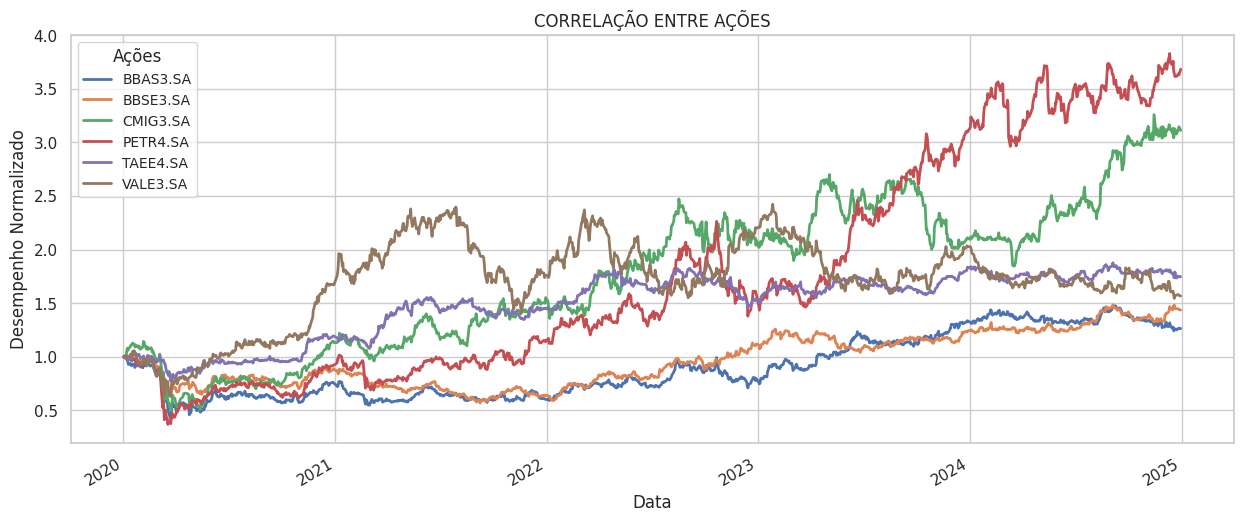

In [60]:
# Configuração para visualização
sns.set_theme(style="whitegrid")
desempenho.plot(figsize=(15, 6), title='CORRELAÇÃO ENTRE AÇÕES', lw=2)
plt.ylabel('Desempenho Normalizado')
plt.xlabel('Data')
plt.legend(title='Ações', loc='upper left', fontsize='small')
plt.show()

### ANALISE DOS FUNDOS DOS IMOBILIÁRIOS

##### RESUMO ESTATÍSTICO DOS FUNDOS IMOBILIÁRIOS

In [49]:
# Lista de FIIs da B3
FIM = ['XPML11.SA', 'VISC11.SA', 'KNCR11.SA', 'HGLG11.SA', 'BTLG11.SA', 'XPLG11.SA']

# Busca de dados no Yahoo Finance, usando yfinance como alternativa
# Usando 'Close' para obter valores de fechamento
fii = yf.download(b3, start='2020-12-31', end='2024-12-31')['Close']

# Estatísticas descritivas
display(fii.agg(['min','mean','median','max']))

[*********************100%***********************]  6 of 6 completed


Ticker,BTLG11.SA,HGLG11.SA,KNCR11.SA,VISC11.SA,XPLG11.SA,XPML11.SA
max,99.925629,159.222397,102.573914,114.645790,103.921478,109.526070
min,73.668129,118.430473,60.800755,71.115723,68.631027,63.698612
mean,86.631225,138.754762,79.622209,91.959292,89.176823,87.119293
median,85.396336,136.179817,76.575054,88.028282,90.019493,82.141041


##### TABELA DO DESEMPENHO NORMALIZADO DOS FUNDOS IMOBILIÁRIOS

In [50]:

# Normalização dos preços
tab = fii / fii.iloc[0]
display(tab)


Ticker,BTLG11.SA,HGLG11.SA,KNCR11.SA,VISC11.SA,XPLG11.SA,XPML11.SA
Date,,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,0.984124,0.993268,1.000000,0.996569,1.000415,1.024855
2021-01-06,0.989865,1.003171,1.009611,1.000257,0.996103,1.000769
2021-01-07,0.991928,1.003059,1.010183,1.001201,0.997513,0.991715
2021-01-08,0.994080,1.011961,1.014188,1.003602,0.995439,1.005381
...,...,...,...,...,...,...
2024-12-20,1.035186,1.106133,1.577750,1.015444,0.937194,1.083671
2024-12-23,1.096422,1.127068,1.617898,1.030222,0.979056,1.110202
2024-12-26,1.102604,1.120331,1.660798,1.062888,0.975515,1.124207


##### GRÁFICO DO DESEMPENHO NORMALIZADO DOS FUNDOS IMOBILIÁRIOS

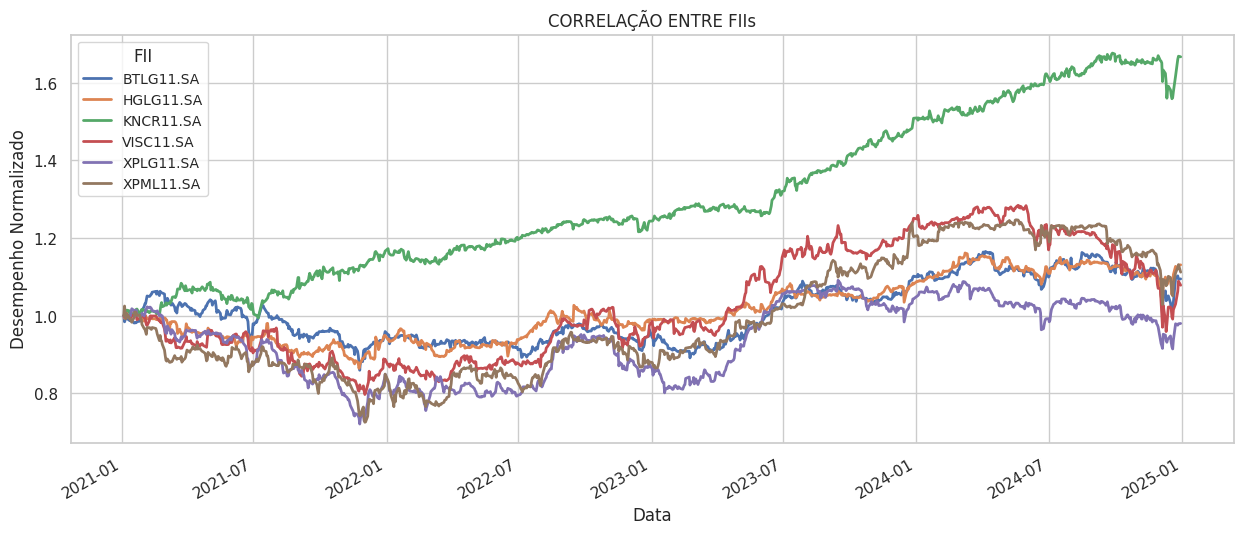

In [51]:
# Configuração para visualização
sns.set_theme(style="whitegrid")
tab.plot(figsize=(15, 6), title='CORRELAÇÃO ENTRE FIIs', lw=2)
plt.ylabel('Desempenho Normalizado')
plt.xlabel('Data')
plt.legend(title='FII', loc='upper left', fontsize='small')
plt.show()